In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [21]:
(train_img,train_lab),(test_img,test_lab)=cifar10.load_data()

In [22]:
train_img.shape

(50000, 32, 32, 3)

In [23]:
train_lab.shape

(50000, 1)

In [24]:
test_img.shape

(10000, 32, 32, 3)

In [25]:
test_lab.shape

(10000, 1)

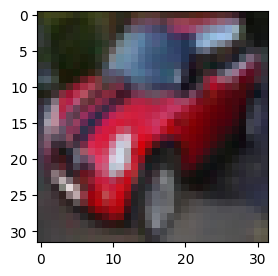

In [26]:
plt.figure(figsize=(3,3))
plt.imshow(train_img[25323])
plt.show()

In [27]:
classes=["airplane","bird","car","deer","dog","frog","horse","ship","truck"]

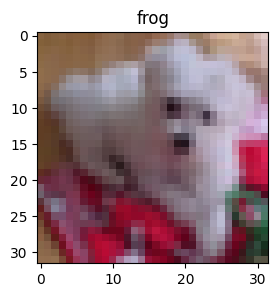

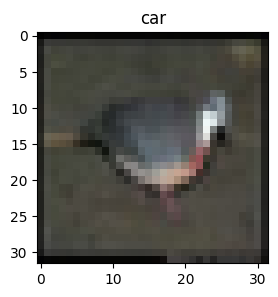

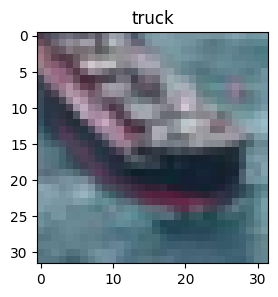

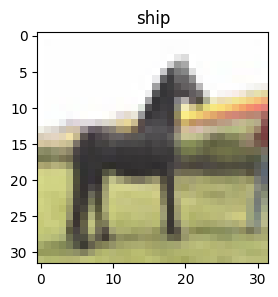

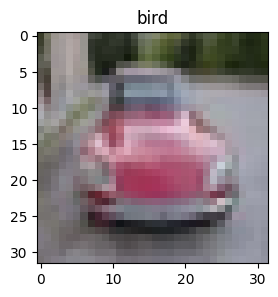

In [28]:
for i in range(5):
    ind=np.random.randint(50000)
    plt.figure(figsize=(3,3))
    plt.imshow(train_img[ind])
    plt.title(classes[train_lab[ind][0]])
    plt.show()

In [29]:
train_img,test_img=train_img/255.0,test_img/255.0

In [30]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(500,activation="relu"),
    Dense(300,activation="relu"),
    Dense(100,activation="relu"),
    Dense(50,activation="relu"),
    Dense(32,activation="relu"),
    Dense(10,activation="softmax")
])

In [31]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [32]:
history=model.fit(train_img,train_lab,epochs=30,batch_size=32,validation_data=(test_img,test_lab))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.2324 - loss: 2.0536 - val_accuracy: 0.3264 - val_loss: 1.8239
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3596 - loss: 1.7696 - val_accuracy: 0.3781 - val_loss: 1.7010
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4022 - loss: 1.6653 - val_accuracy: 0.4428 - val_loss: 1.5656
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.4312 - loss: 1.5878 - val_accuracy: 0.4448 - val_loss: 1.5787
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4445 - loss: 1.5488 - val_accuracy: 0.4557 - val_loss: 1.5354
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4544 - loss: 1.5179 - val_accuracy: 0.4627 - val_loss: 1.5023
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4725 - loss: 1.4751 - val_accuracy: 0.4640 - val_loss: 1.4973
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4886 -

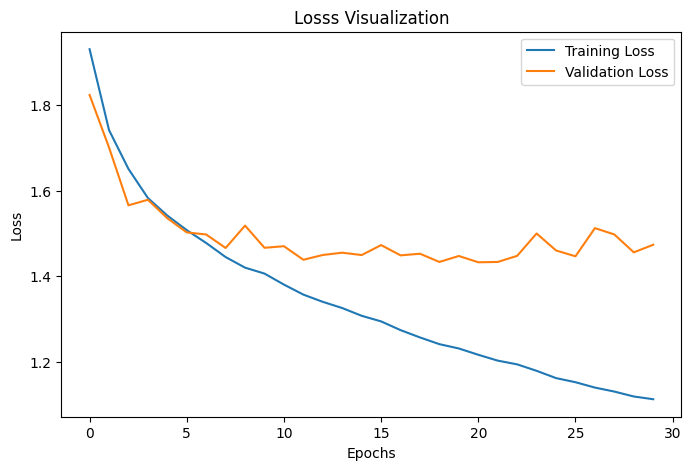

In [33]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.title("Losss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

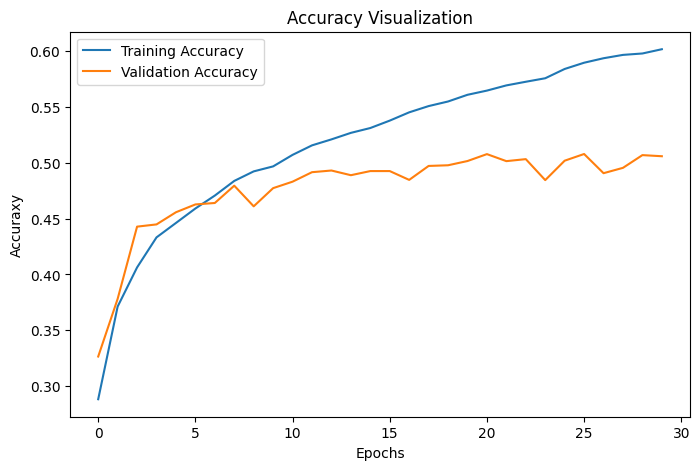

In [34]:
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuraxy")
plt.show()

In [35]:
def image_prediction(path):
    img=load_img(path,target_size=(32,32))
    img_arr=img_to_array(img)
    img_arr_norm=img_arr/255.0
    img_flatten=np.expand_dims(img_arr_norm,axis=0)
    prediction=model.predict(img_flatten)[0]
    pred_class=classes[np.argmax(prediction)]
    return pred_class

In [36]:
image_prediction("cat.jfif")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


'car'